# Coding Temple's Data Analytics Program:
---
## Python for DA: Machine Learning Assignment

For your assignment today, you will look through the [UCI Irvine ML Repository](https://archive.ics.uci.edu/datasets) to find a dataset that you can build a model on. Your workflow should look something like:

- Import any necessary libraries
- Load in the data
- Clean/Tidy the Data
- Explore the data:
    - Gather all summary statistics
    - Visualize your data and your target
    - Identify any relationships between your target and the feature matrix
    - Loop back through and continue cleaning data/feature engineering as needed
- Split the data
- Establish a baseline model
- Create model
- Establish model accuracy
- Hypertune your model
- Communicate your results

The model, data, and methods you use are all completely up to you for this assignment! Ensure you label your notebook with markdown cells and proper comments

Import Libraries

In [1]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Load in data

In [6]:
df=pd.read_csv(r"C:\Users\ALIYA\OneDrive\Documents\Coding_Temple\Week 4\Day3\forestfires.csv")



Clean/Tidy the Data

In [5]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Explore the data:

    - Gather all summary statistics
    - Visualize your data and your target
    - Identify any relationships between your target and the feature matrix
    - Loop back through and continue cleaning data/feature engineering as needed

c:\Users\ALIYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


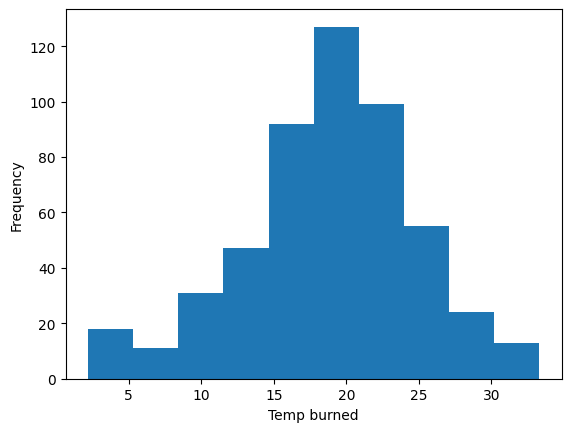

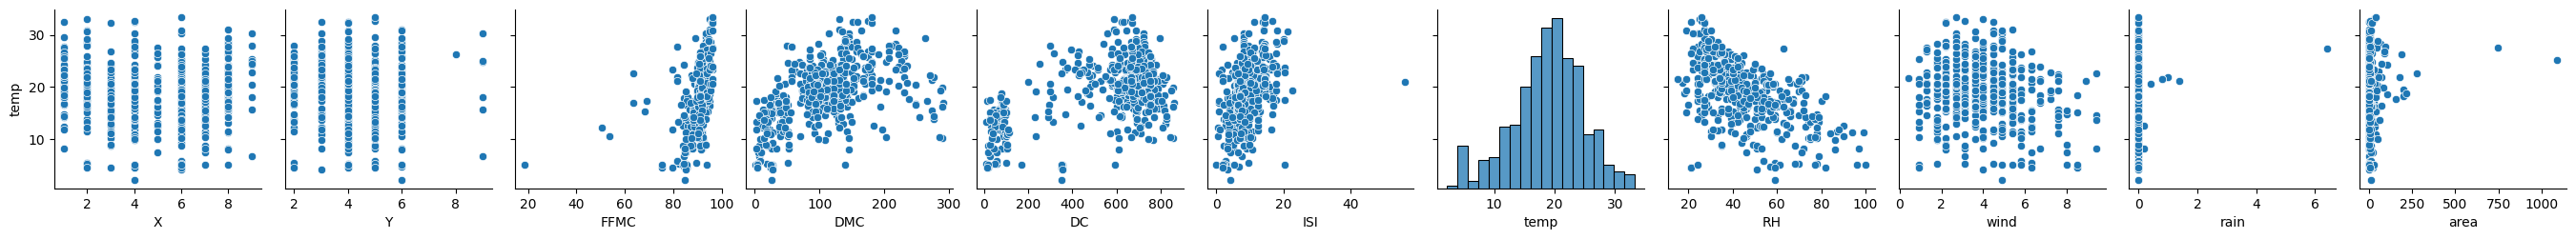

In [26]:
plt.hist('temp', data=df);
plt.xlabel('Temp burned');
plt.ylabel('Frequency');
sns.pairplot(df, y_vars=['temp'])

Split the data

In [21]:
# Step 1: Identify the target vector
target = 'temp'

# Step 2: Separate the target vector from the feature matrix
X = df.drop(columns=target)
y = df[target]

# Step 3: Split the data into a training and testing set, using sklearn
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=.8, random_state=42)

# View our testing data
display(x_test)
print(y_test)

# Assert statement to double-check our work:
assert len(x_train) + len(x_test) == len(X), 'You did not separate the data properly'

,X,Y,month,day,FFMC,DMC,DC,ISI,RH,wind,rain,area
304,6,5,may,sat,85.1,28.0,113.8,3.5,94,4.9,0.0,0.00
501,7,5,aug,tue,96.1,181.1,671.2,14.3,65,4.9,0.8,0.00
441,8,6,aug,mon,92.1,207.0,672.6,8.2,29,1.8,0.0,1.23
153,5,4,sep,fri,94.3,85.1,692.3,15.9,47,4.9,0.0,1.46
503,2,4,aug,wed,94.5,139.4,689.1,20.0,30,4.9,0.0,1.95
...,...,...,...,...,...,...,...,...,...,...,...,...
167,6,5,aug,wed,96.0,127.1,570.5,16.5,33,4.5,0.0,2.51
275,4,6,dec,thu,84.6,26.4,352.0,2.0,61,4.9,0.0,5.38
509,5,4,aug,fri,91.0,166.9,752.6,7.1,71,7.6,1.4,2.17
513,2,4,aug,sun,81.6,56.7,665.6,1.9,71,5.8,0.0,54.29


304    11.3
501    21.6
441    25.5
153    20.1
503    29.2
       ... 
167    23.4
275     5.1
509    21.1
513    21.9
320    18.9
Name: temp, Length: 104, dtype: float64


Establish a baseline model

In [22]:
baseline = [df.temp.mean()] * len(df)
baseline

[18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,
 18.88916827852998,


Create model

In [23]:
# Create Encoder
ohe = OneHotEncoder(use_cat_names=True)

# Fit the Encoder
ohe.fit(x_train, y_train)

# Transform the data
x_trans = ohe.transform(x_train)

# Create model object
model_dt = LinearRegression()

# Fit the model object
display(model_dt.fit(x_trans, y_train))


#Create the pipeline object
model_lr = make_pipeline(
    #Add in any preprocessors to the pipeline
    OneHotEncoder(use_cat_names=True),
    #Add in the model object to the pipeline
    LinearRegression()
)

# Fit the pipeline
display(model_lr.fit(x_train, y_train))

#  Create the pipeline object
pipe_dt = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeRegressor(random_state=42)
)

#Fit the pipeline
display(pipe_dt.fit(x_train, y_train))

#Create the pipeline object
model_rf = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestRegressor(random_state=42)
)

#Fit the pipeline
display(model_rf.fit(x_train, y_train))


#Create the pipeline object
model_xg = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    XGBRegressor(random_state=42)
)

#Fit the pipeline
display(model_xg.fit(x_train, y_train))

LinearRegression()

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['month', 'day'], use_cat_names=True)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['month', 'day'], use_cat_names=True)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['month', 'day'], use_cat_names=True)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['month', 'day'], use_cat_names=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

Establish model accuracy

In [27]:
print('Decision Tree Scores:')
print(r2_score(y_train, pipe_dt.predict(x_train)))
print(r2_score(y_test, pipe_dt.predict(x_test)))
print('------------------------------')
print('Linear Model Score:')
print(r2_score(y_train, model_lr.predict(x_train)))
print(r2_score(y_test, model_lr.predict(x_test)))
print('---------------------------------------')
print('Random Forest Score:')
print(r2_score(y_train, model_rf.predict(x_train)))
print(r2_score(y_test, model_rf.predict(x_test)))
print('---------------------------------------')
print('XGBoost Score:')
print(r2_score(y_train, model_xg.predict(x_train)))
print(r2_score(y_test, model_xg.predict(x_test)))

Decision Tree Scores:
1.0
0.68711506815718
------------------------------
Linear Model Score:
0.7860205510975059
0.7356603580711478
---------------------------------------
Random Forest Score:
0.96982324243727
0.8686314322626866
---------------------------------------
XGBoost Score:
0.9999848330667473
0.8669505956279264


Hypertune your model

In [25]:
#Create a parameter grid
param_grid = {
    'randomforestregressor__n_estimators': range(200,400, 10),
    'randomforestregressor__max_depth' : range(10,110, 10),
    'randomforestregressor__min_samples_split' : [2,5,10],
    'randomforestregressor__min_samples_leaf' : [1,2,5]
}

#Instantiate the RSCV module with the model object and the param_grid object
clf = RandomizedSearchCV(model_rf, param_grid)

#Fit the data
clf.fit(x_train, y_train)

clf.best_params_
clf.best_score_

0.7879023681026947

# Communicate your results

The data for temp has a standard distubrtion. The baseline was 18.88. The mpst acurate predictor was the XGBoost Score.